In [84]:
%matplotlib notebook
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import numpy as np

In [85]:
# File to Load 
city_data_fpath = "data/city_data.csv"
ride_data_fpath = "data/ride_data.csv"

# Read the City and Ride Data
city_data= pd.read_csv(city_data_fpath)
ride_data= pd.read_csv(ride_data_fpath)

# Checking for duplicates in input files; Not required as no duplicates in file found
# dup_data=city_data.duplicated("city")
#for i in dup_data.index:
   # if dup_data[i]==True:
     #   print(dup_data[i])
        
# Combine the data into a single dataset
city_ride_table=pd.merge(ride_data, city_data, on="city", how="inner")

# Display the data table for preview
city_ride_table.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

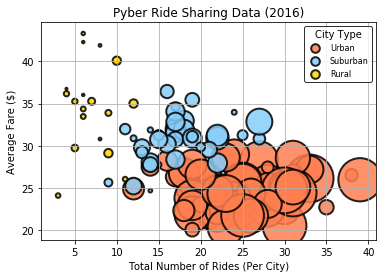

In [87]:
# Obtain the x and y coordinates for each of the three city types
Tot_Rides_Per_City = city_ride_table.groupby("city").count()["ride_id"]
Tot_Rides_Per_City

Avg_Fare = city_ride_table.groupby("city").mean()["fare"]
Avg_Fare

Tot_Driver = city_ride_table.groupby("city").sum()["driver_count"]
Tot_Driver

city_type = city_data.set_index('city')['type']
city_type

# Creating DataFrame 
Tot_Driver_Type_df = pd.DataFrame( {"Rides_Per_City": Tot_Rides_Per_City, 
                                    "Avg_Fare": Avg_Fare,
                                    "Total_Driver": Tot_Driver, 
                                    "City_Type": city_type })
Tot_Driver_Type_df

#Seggregating dataframe for each city type
CT_Urban= Tot_Driver_Type_df[Tot_Driver_Type_df["City_Type"]=="Urban"]
CT_Urban
CT_Suburban= Tot_Driver_Type_df[Tot_Driver_Type_df["City_Type"]=="Suburban"]
CT_Suburban
CT_Rural= Tot_Driver_Type_df[Tot_Driver_Type_df["City_Type"]=="Rural"]
CT_Rural


CT_Color = {"Urban": "Coral", "Suburban": "Lightskyblue", "Rural": "Gold"}

# Build the scatter plots for each city types
plt.scatter(CT_Urban["Rides_Per_City"], CT_Urban["Avg_Fare"], s=CT_Urban["Total_Driver"],
            c=CT_Color["Urban"],  edgecolors="black", label = 'Urban', alpha=0.85, linewidth=2)
plt.scatter(CT_Suburban["Rides_Per_City"], CT_Suburban["Avg_Fare"], s=CT_Suburban["Total_Driver"],
            c=CT_Color["Suburban"],  edgecolors="black", label = 'Suburban', alpha=0.85, linewidth=2)
plt.scatter(CT_Rural["Rides_Per_City"], CT_Rural["Avg_Fare"], s=CT_Rural["Total_Driver"],
            c=CT_Color["Rural"],  edgecolors="black", label = 'Rural', alpha=0.85, linewidth=2)


# Incorporate the other graph properties
plt.grid()
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")

# Create a legend
lgd= plt.legend(frameon = True, title="City Type", edgecolor = 'black', scatterpoints=1,
           loc='best', fontsize=8)
lgd.legendHandles[0]._sizes = [75]
lgd.legendHandles[1]._sizes = [75]
lgd.legendHandles[2]._sizes = [75]

# Incorporate a text label regarding circle size

# Save Figure
plt.savefig("data/Pyber_Ride_Sharing_BubbleChart.png")
plt.show()

## Total Fares by City Type

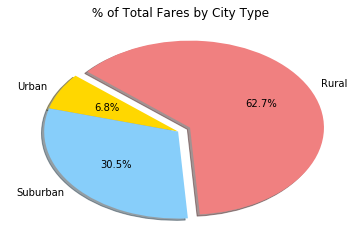

In [88]:
# Calculate Type Percents  -  % of Total Fares by City Type  

# Setting Labels
CType= city_type.unique()
labels = [ CType[0], CType[1], CType[2] ] 

# The values of each section of the pie chart
sizes = city_ride_table.groupby(["type"]).sum()["fare"]

# The colors of each section of the pie chart
colors = ["Gold", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)
# Build Pie Chart

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title(" % of Total Fares by City Type")

# Save Figure
plt.savefig("data/Pyber_TotalFareByCityType.png")
plt.show()


## Total Rides by City Type

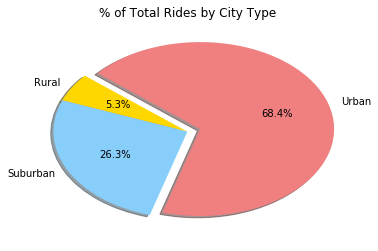

In [89]:
# Calculate Ride Percents  - % of Total Rides by City Type

# Setting Labels 
CType= city_type.unique()
labels = [ CType[2], CType[1], CType[0] ] #'Urban', 'Suburban', 'Rural'

# The values of each section of the pie chart
sizes = city_ride_table.groupby(["type"]).count()["ride_id"]

# The colors of each section of the pie chart
colors = ["Gold", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)
# Build Pie Chart

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("data/Pyber_TotalRidesByCityType.png")
plt.show()

## Total Drivers by City Type

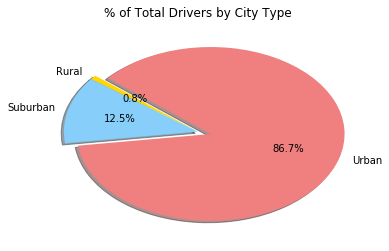

In [90]:
# Calculate Driver Percents  - % of Total Drivers by City Type

# Setting Labels 
CType= city_type.unique()
labels = [ CType[2], CType[1], CType[0] ] 

# The values of each section of the pie chart
sizes = city_ride_table.groupby(["type"]).sum()["driver_count"]

# The colors of each section of the pie chart
colors = ["Gold", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)

# Build Pie Chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("data/Pyber_TotalDriversByCityType.png")
plt.show()